<a href="https://colab.research.google.com/github/gourab337/playhouse/blob/master/Covid_19_DGR_and_Growth_Rate(Graph).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import requests
import ssl


 HIGH RISK COUNTRIES (DGR > 2%) : 

Sl No.      COUNTRY                                 DEATH GROWING RATE 

   1.       El Salvador                             3.125
   2.       Ghana                                   5.263157894736842
   3.       Japan                                   3.571428571428571
   4.       Austria                                 2.1094112192860455
   5.       Kenya                                   3.225806451612903
   6.       Ethiopia                                4.651162790697675
   7.       Gabon                                   33.33333333333333
   8.       Monaco                                  2.1739130434782608
   9.       United States of America                4.166666666666666
  10.       Denmark                                 2.026693030153238
  11.       Paraguay                                5.555555555555555
  12.       Argentina                               8.333333333333332
  13.       Cuba                                    14.28571

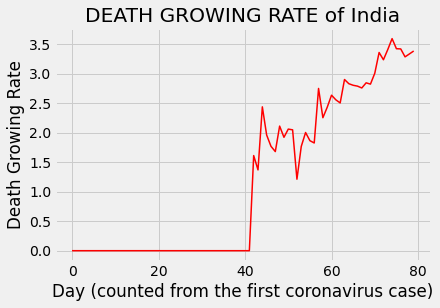


Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):
1
      DAY     DATE          CONFIRMED      DEATHS       DEATH GROWING RATE (in %)
        1.    2020-01-30             1           0         0.0000
        2.    2020-01-31             1           0         0.0000
        3.    2020-02-01             1           0         0.0000
        4.    2020-02-02             2           0         0.0000
        5.    2020-02-03             3           0         0.0000
        6.    2020-02-04             3           0         0.0000
        7.    2020-02-05             3           0         0.0000
        8.    2020-02-06             3           0         0.0000
        9.    2020-02-07             3           0         0.0000
       10.    2020-02-08             3           0         0.0000
       11.    2020-02-09             3           0         0.0000
       12.    2020-02-10             3           0         0.0000
       13.    2020-02-11            

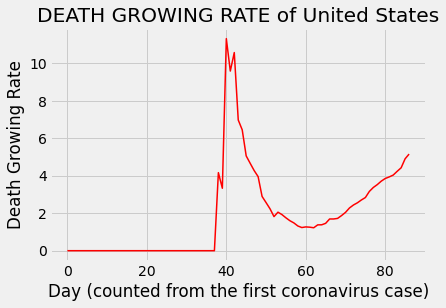


Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):
1
      DAY     DATE          CONFIRMED      DEATHS       DEATH GROWING RATE (in %)
        1.    2020-01-23             1           0         0.0000
        2.    2020-01-24             2           0         0.0000
        3.    2020-01-25             2           0         0.0000
        4.    2020-01-26             5           0         0.0000
        5.    2020-01-27             5           0         0.0000
        6.    2020-01-28             5           0         0.0000
        7.    2020-01-29             5           0         0.0000
        8.    2020-01-30             5           0         0.0000
        9.    2020-01-31             7           0         0.0000
       10.    2020-02-01             8           0         0.0000
       11.    2020-02-02             8           0         0.0000
       12.    2020-02-03            11           0         0.0000
       13.    2020-02-04            

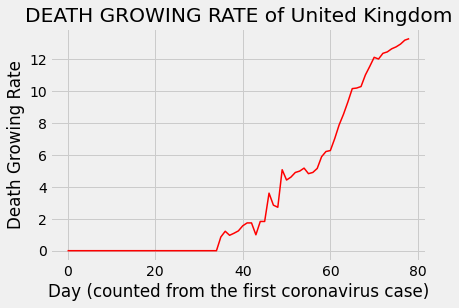


Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):
0
Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : 
Germany


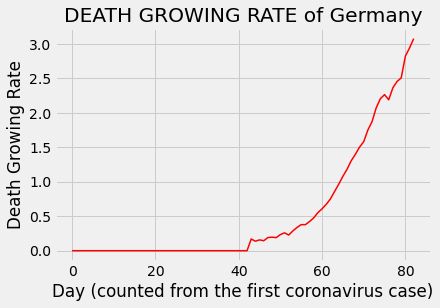


Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):
0
Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : 
0

EXIT Successful. 
Thank You. 



In [40]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

style.use('fivethirtyeight')

url = "https://api.covid19api.com/total/dayone/country/"
url2 = "https://api.covid19api.com/countries"

print("\n HIGH RISK COUNTRIES (DGR > 2%) : \n")
print("Sl No.      " + "COUNTRY".ljust(40," ") + "DEATH GROWING RATE \n")

hrc = set([])

response2 = requests.request("GET", url2)
data2 = response2.json()

k=0
for i in data2 :
    #break
    try :
        url = "https://api.covid19api.com/total/dayone/country/"
        url = url + i["Slug"]

        response = requests.request("GET", url)
        data = response.json()

        for j in data :
            c=float(j["Confirmed"])
            d=float(j["Deaths"])
        
            if c==0 :
                dgr=0            
            else :
                dgr=(d/c)*100

            if dgr>=2 :
                hrc.add(i["Country"])
                k=k+1
                print((str(k) + ". ").rjust(6," ") + "      " + i["Country"].ljust(40," ") + str(dgr))
                break
    except :
        print(("------------The country " + i["Country"] + " had some data problem ").ljust(80,"-") + " Check your connection and try again.")        

print("")
#print(hrc)
#print("")

#print(" " + " "+ " "+ " "+" "+ " ")

while True :
    a = input("Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : \n")
    if a == '0' :
        break
    else :
        try :
            a = a.lower()            
            url = "https://api.covid19api.com/total/dayone/country/"

            if (a == 'usa') or (a == 'us') or (a == 'united states of america') or (a == 'the united states of america') :
                a = "united states"
            elif (a == 'uk') or (a == 'england') or (a == 'great britain'):
                a = "united kingdom"
            elif a == 'uae':
                a = 'united arab emirates'

            url = url + a.replace(" ","-")

            response = requests.request("GET", url)
            data = response.json()

            i=0
            x=[0]
            y=[0]            
            for j in data :
                i=i+1
                c=float(j["Confirmed"])
                d=float(j["Deaths"])
        
                if c==0 :
                    dgr=0            
                else :
                    dgr=(d/c)*100

                x.append(i)
                y.append(dgr)

            plt.plot(x,y,c='r',linewidth=1.5)
            plt.xlabel('Day (counted from the first coronavirus case)') 
            plt.ylabel('Death Growing Rate') 
            plt.title('DEATH GROWING RATE of ' + a.title()) 
            plt.show()
            print("")

            resp=int(input("Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):\n"))
            if resp == 1:
              a = a.lower()            
              url = "https://api.covid19api.com/total/dayone/country/"

              if (a == 'usa') or (a == 'us') or (a == 'united states of america') or (a == 'the united states of america') :
                  a = "united states"
              elif (a == 'uk') or (a == 'england') or (a == 'great britain'):
                  a = "united kingdom"
              elif a == 'uae':
                   a = 'united arab emirates'

              url = url + a.replace(" ","-")

              response = requests.request("GET", url)
              data = response.json()
              i=0
              x=[0]
              y=[0]            
              for j in data :
                i=i+1
                c=float(j["Confirmed"])
                d=float(j["Deaths"])
        
                if c==0 :
                    dgr=0            
                else :
                    dgr=(d/c)*100

                x.append(i)
                y.append(dgr)
                
                if i==1 :
                    print("      DAY     DATE          CONFIRMED      DEATHS       DEATH GROWING RATE (in %)")

                print("    " + (str(i) + ".    ").rjust(10," ") + str(j["Date"][0:10]) + "    " + str(int(c)).rjust(10," ") + "    " + str(int(d)).rjust(8," ") + "      " ,end="")
                print(f'{dgr:9.4f}')    
                               
            
        except :                
            print("    The country '" + a + "' had some data problem \n---" + " Check your connection and try again (or) Check the country name again.---\n")

print("\nEXIT Successful. \nThank You. \n")
